In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [47]:
data = pd.read_csv("Ecommerce.csv")
data.head(6)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448


In [49]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [141]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [51]:
x = data[['Avg. Session Length' , 'Time on App' , 'Time on Website' , 'Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [121]:
y  = data['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [123]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.25 , random_state = 42)

In [125]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
227,31.948017,13.085357,37.605653,2.648597
417,32.215527,12.216855,36.953960,2.910531
203,31.047222,11.199661,38.688709,3.088764
126,32.657269,11.957923,36.634652,4.106055
329,32.837893,13.185181,35.921595,1.823595
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [127]:
y_train

227    461.920877
417    438.417742
203    392.497399
126    516.831557
329    445.062185
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 375, dtype: float64

In [129]:
model = LinearRegression()

In [131]:
model.fit(x_train , y_train)

LinearRegression()

In [145]:
model.coef_

array([25.69083176, 38.68815596,  0.45279906, 61.71050259])

In [135]:
priductiion = model.predict(x_test)

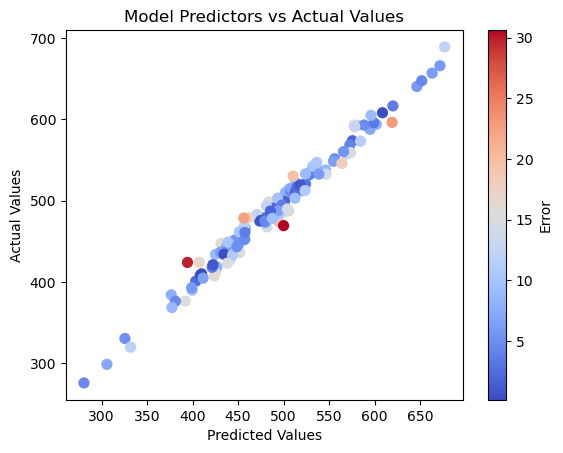

In [149]:
errors = np.abs(priductiion - y_test)

plt.scatter(priductiion , y_test , c =errors , cmap = 'coolwarm' , s= 50)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model Predictors vs Actual Values')

plt.colorbar(label = 'Error')
plt.show()

In [151]:
print('Mean Absolute Error' , mean_absolute_error(y_test , priductiion))
print('Mean Square Error' , mean_squared_error(y_test , priductiion))

Mean Absolute Error 8.460454171767685
Mean Square Error 105.64514288866154


In [153]:
res = pd.DataFrame({
    'Actual' : y_test , 
    'preduction': priductiion , 
    'Difference': y_test - priductiion
})
res

,Actual,preduction,Difference
361,401.033135,403.360875,-2.327740
73,534.777188,542.496522,-7.719334
374,418.602742,426.790619,-8.187877
155,503.978379,501.980005,1.998374
104,410.069611,409.900166,0.169445
...,...,...,...
220,519.372977,518.367294,1.005683
176,532.717486,538.787918,-6.070432
320,368.654785,377.270458,-8.615673
153,657.019924,663.349499,-6.329575
